# EDA MIX data

To explore all the 81 colluns of this data frame the NEO team decide to split the EDA in 3 notebooks where:
1- EDA of Structural Data
2- EDA of Rooms data
3- EDA of Mix Data (data that's not about Structural and Rooms data)

In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

train = pd.read_csv('../data/raw/train.csv')

**Mix Columns**

The columns of the train dataset that represents what we're calling mix data are represented in the strings in the variable **mix_columns**

In [3]:
mix_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
               'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
               'Condition2', 'YearBuilt', 'YearRemodAdd', 'BldgType', 'HouseStyle',
               'Functional', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
               'SaleType', 'SaleCondition', 'SalePrice']

train[mix_columns].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BldgType,HouseStyle,Functional,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,1Fam,2Story,Typ,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,1Fam,1Story,Typ,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,1Fam,2Story,Typ,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,1Fam,2Story,Typ,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,1Fam,2Story,Typ,NaN,0,12,2008,WD,Normal,250000


In [7]:
train[mix_columns].isna().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BldgType         0.000000
HouseStyle       0.000000
Functional       0.000000
MiscFeature      0.963014
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
dtype: float64

In [5]:
train[mix_columns].describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,1971.267808,1984.865753,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,30.202904,20.645407,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,2000.000000,2004.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,2010.000000,2010.000000,15500.000000,12.000000,2010.000000,755000.000000


## Nan Values

This part of the dataset has NanValue in 3 columns. In the description, it's easy to understand explanation for the Alley and MiscFeature columns, so we're going to understand why we have nan values in LotFrontage column

In [12]:
train[train['MSZoning']=='RH']['LotFrontage']

341     60.0
383     60.0
543     34.0
635     60.0
671     54.0
681     55.0
778     60.0
840      NaN
913     82.0
951     60.0
955     82.0
1030     NaN
1206     NaN
1234    55.0
1264    34.0
1326    70.0
Name: LotFrontage, dtype: float64

## Sales variables

In this topic we're going to analyse the variables that's related with the sale. This variables are:

- MoSold
- YrSold
- SaleType
- SaleCondition
- SalePrice

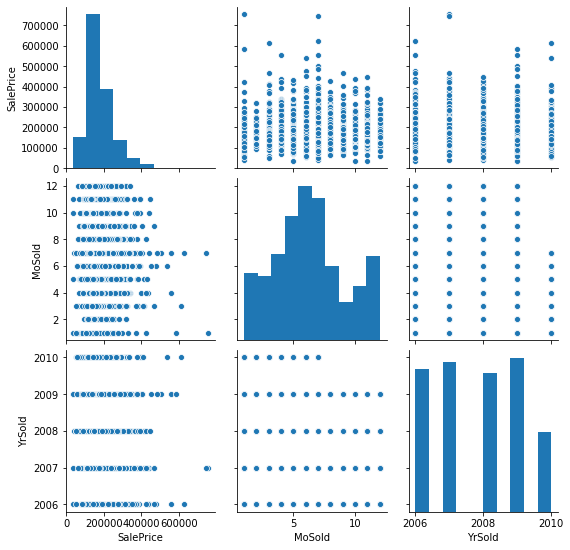

In [22]:
sns.pairplot(train[['SalePrice','MoSold','YrSold']])

In [29]:
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

**Sale Condition**

The sale condition is a categorical variable that has 6 levels. The levels "Family", "Alloca" and "AdjLand" has few data, so we're going to joing this categorical's in a level named 'Other'.


In [41]:
train['SaleCondition'].replace(['AdjLand','Alloca','Family'],'Other', inplace=True)
train.groupby(['SaleCondition'])['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.0,745000.0
Normal,1198.0,175202.219533,69713.636280,39300.0,130000.00,160000.0,205000.0,755000.0
Other,36.0,150473.027778,62336.363590,55993.0,108719.25,135500.0,173000.0,359100.0
Partial,125.0,272291.752000,103696.404119,113000.0,193879.00,244600.0,339750.0,611657.0


In [42]:
train['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [13]:
train['SaleType'].replace(['ConLD', 'ConLI', 'ConLw'], 'Con', inplace=True)
train['SaleType'].replace('CWD', 'WD', inplace=True)
train.groupby(['SaleType'])['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,43.0,143973.255814,47098.294314,60000.0,112000.00,139000.0,160500.00,287000.0
Con,21.0,167079.904762,91703.378565,60000.0,110000.00,144000.0,207500.00,451950.0
New,122.0,274945.418033,103239.582158,113000.0,194050.25,247453.0,341919.75,611657.0
Oth,3.0,119850.000000,28441.035495,93500.0,104775.00,116050.0,133025.00,150000.0
WD,1271.0,173518.904013,71172.213583,34900.0,128975.00,158000.0,203500.00,755000.0


**Sale date**

We're analyse how the sale price change a long the time. This can inform, indirectly, economics patterns

In [21]:
train.groupby(['YrSold'])['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


In [46]:
train[train['YrSold']==2010]['MoSold'].value_counts()

5    48
4    39
6    36
3    21
2    15
1    10
7     6
Name: MoSold, dtype: int64

In [8]:
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Mean", "Std"))

fig.add_trace(go.Scatter(x=np.sort(train['YrSold'].unique()), 
                         y=train.groupby(['YrSold'])['SalePrice'].mean()),
            row=1,col=1)

fig.add_trace(go.Scatter(x=np.sort(train['YrSold'].unique()), 
                         y=train.groupby(['YrSold'])['SalePrice'].std()),
            row=1,col=2)

fig.update_layout(showlegend=False, title_text="Mean and Std of Sales Price per Year")
fig.show()

In [22]:
train['day'] = 1
train['dateSold'] = pd.to_datetime(train.rename(columns={"YrSold": "year",
                                                         "MoSold": "month"})[['year','month','day']],
                                   unit='D')
train.drop(columns=['day'], inplace=True)

In [18]:
fig = px.line(train.groupby(['dateSold'])[['SalePrice', 'dateSold']].mean(), 
              x=train.groupby(['dateSold'])[['SalePrice', 'dateSold']].mean().index,
              y='SalePrice')
fig.show()

In [21]:
fig = px.line(train.groupby(['dateSold'])[['SalePrice', 'dateSold']].std(), 
              x=train.groupby(['dateSold'])[['SalePrice', 'dateSold']].std().index,
              y='SalePrice')
fig.show()